In [1]:
from graphipy.graphipy import GraphiPy

In [2]:
# create GraphiPy object
graphipy = GraphiPy()

In [3]:
# The reddit API needs these credentials
# CLIENT_ID = ""
# CLIENT_SECRET = ""
# USER_AGENT = ""
# USERNAME = ""
# PASSWORD = ""
# reddit_api_credentials = {
#     "client_id": CLIENT_ID,
#     "client_secret": CLIENT_SECRET,
#     "user_agent": USER_AGENT,
#     "username": USERNAME,
#     "password": PASSWORD
# }

reddit_api_credentials = {
    "client_id": ' ',
    "client_secret": ' ',
    "user_agent": ' ',
    "username": " ",
    "password": " "
}

# create the reddit object
reddit = graphipy.get_reddit(reddit_api_credentials)

# Find Subreddits by Keyword

In [4]:
keyword = "python"

# Every function call modifies the graph that is sent as input
# subreddits_name = graphipy.create_graph()
# reddit.fetch_subreddits_by_name(subreddits_name, keyword, limit=3)

# However, it also returns the graph modified so you can assign it to other variables like so:
subreddits_name = reddit.fetch_subreddits_by_name(graphipy.create_graph(), keyword, limit=5)

In [5]:
# To get the list of available nodes
# However, there's only one type in this case
print(subreddits_name.get_nodes().keys())

dict_keys(['subreddit'])


In [6]:
# You can get the dataframe from Pandas by specifying the node
subreddit_df = subreddits_name.get_df("subreddit")

In [7]:
subreddit_df.head(5)

,_id,Label,label_attribute,notification_level,user_flair_background_color,wls,banner_img,user_sr_theme_enabled,user_flair_text,submit_text_html,...,accounts_active_is_fuzzed,advertiser_category,public_description,link_flair_enabled,allow_images,videostream_links_count,comment_score_hide_mins,show_media_preview,submission_type,user_is_subscriber
0,2qh0y,subreddit,subreddit,None,None,6,,True,None,None,...,False,Technology,"news about the dynamic, interpreted, interacti...",True,True,0,0,True,any,False
1,2tqzl,subreddit,subreddit,None,None,None,,True,None,None,...,False,None,,False,True,0,0,True,any,False
2,3l7v1,subreddit,subreddit,None,None,None,,True,None,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",...,False,None,A place to discuss Python 2.7 without all of h...,False,False,0,0,True,any,False
3,3evbu,subreddit,subreddit,None,None,None,,True,None,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",...,False,None,A place to get a quick fix of python tips and ...,True,False,NaN,0,True,self,False
4,3649w,subreddit,subreddit,None,None,None,,True,None,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",...,False,None,A subreddit for python developers to share art...,False,False,0,1440,True,any,False


In [8]:
# show the attributes of this node
subreddit_df.iloc[0]

_id                                                                        2qh0y
Label                                                                  subreddit
label_attribute                                                        subreddit
notification_level                                                          None
user_flair_background_color                                                 None
wls                                                                            6
banner_img                                                                      
user_sr_theme_enabled                                                       True
user_flair_text                                                             None
submit_text_html                                                            None
user_flair_css_class                                                        None
user_flair_template_id                                                      None
user_is_banned              

In [9]:
# we can use the display name of the subreddit to look at its submissions
subreddit_df.display_name

0                Python
1             python101
2               Python2
3            pythontips
4          pythoncoding
5       PythonProjects2
6         python_netsec
7    pythonforengineers
8             pythondev
9               python3
Name: display_name, dtype: object

# Find Submissions in a Subreddit

In [10]:
# let's try searching for submissions in Python which is the first result!
subreddit_to_search = subreddit_df.display_name[0]

# Call the appropriate function
subreddit_submissions = reddit.fetch_subreddit_submissions(
        graphipy.create_graph(), subreddit_name=subreddit_to_search, limit=3)

In [11]:
# Get all the node dataframes available from the query
ss_nodes = subreddit_submissions.get_nodes()

# Find out list of available nodes
print(ss_nodes.keys())

dict_keys(['subreddit', 'redditor', 'submission'])


In [12]:
ss_nodes["submission"].head()

,_id,Label,label_attribute,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,...,author_patreon_flair,author_flair_text_color,permalink,whitelist_status,stickied,url,subreddit_subscribers,created_utc,media,is_video
0,9o5w2z,submission,submission,None,Python,Please read the rules \- they've updated sligh...,t2_628u,False,None,0,...,False,dark,/r/Python/comments/9o5w2z/rpython_official_job...,all_ads,True,https://www.reddit.com/r/Python/comments/9o5w2...,291699,1539547719.0,None,False
1,9uolpb,submission,submission,None,Python,Tell /r/python what you're working on this wee...,t2_6l4z3,False,None,0,...,False,None,/r/Python/comments/9uolpb/whats_everyone_worki...,all_ads,True,https://www.reddit.com/r/Python/comments/9uolp...,291699,1541513354.0,None,False
2,9wf0t0,submission,submission,None,Python,,t2_1vo9cg9m,False,None,0,...,False,None,/r/Python/comments/9wf0t0/built_a_small_little...,all_ads,False,https://i.redd.it/46hotd0c6xx11.gif,291699,1542037132.0,None,False
3,9wd0pt,submission,submission,None,Python,,t2_2o7eaff,False,None,0,...,False,None,/r/Python/comments/9wd0pt/generate_music_using...,all_ads,False,https://rubikscode.net/2018/11/12/generate-mus...,291699,1542019312.0,None,False
4,9wi5ep,submission,submission,None,Python,## Link: https://github.com/0Hughman0/bonfig\n...,t2_gypkr,False,None,0,...,False,None,/r/Python/comments/9wi5ep/dont_write_configura...,all_ads,False,https://www.reddit.com/r/Python/comments/9wi5e...,291699,1542056814.0,None,False


In [13]:
ss_nodes["redditor"].head()

,_id,Label,label_attribute,is_employee,icon_img,pref_show_snoovatar,name,is_friend,created,has_subscribed,hide_from_robots,created_utc,link_karma,comment_karma,is_gold,is_mod,verified,subreddit,has_verified_email
0,628u,redditor,redditor,False,https://a.thumbs.redditmedia.com/wSlep7xMBqlqI...,True,aphoenix,False,1147838967.0,True,False,1147810167.0,31954,113290,True,True,True,"{'default_set': True, 'user_is_contributor': F...",True
1,6l4z3,redditor,redditor,False,https://www.redditstatic.com/avatars/avatar_de...,False,AutoModerator,False,1325769868.0,True,False,1325741068.0,1778,445850,True,True,False,None,True
2,1vo9cg9m,redditor,redditor,False,https://styles.redditmedia.com/t5_mhwlc/styles...,False,echanuda,False,1532921209.0,True,False,1532892409.0,299,266,False,False,True,"{'default_set': True, 'user_is_contributor': F...",False
3,2o7eaff,redditor,redditor,False,https://www.redditstatic.com/avatars/avatar_de...,False,RubiksCodeNMZ,False,1496251575.0,True,False,1496222775.0,1442,28,False,False,True,"{'default_set': True, 'user_is_contributor': F...",True
4,gypkr,redditor,redditor,False,https://www.redditstatic.com/avatars/avatar_de...,False,CrambleSquash,False,1402681013.0,True,False,1402652213.0,820,2372,False,True,False,None,False


In [14]:
ss_nodes["subreddit"].head()

,_id,Label,label_attribute,notification_level,user_flair_background_color,wls,banner_img,user_sr_theme_enabled,user_flair_text,submit_text_html,...,accounts_active_is_fuzzed,advertiser_category,public_description,link_flair_enabled,allow_images,videostream_links_count,comment_score_hide_mins,show_media_preview,submission_type,user_is_subscriber
0,2qh0y,subreddit,subreddit,None,None,6,,True,None,None,...,False,Technology,"news about the dynamic, interpreted, interacti...",True,True,0,0,True,any,False


In [15]:
# The same works with edges
ss_edges = subreddit_submissions.get_edges()
print(ss_edges.keys())

dict_keys(['posted', 'submission_created_by', 'on', 'has_submission'])


In [16]:
ss_edges["posted"].head()

,Source,Target,Label,label_attribute,_id
0,628u,9o5w2z,POSTED,POSTED,628u9o5w2zPOSTED
1,6l4z3,9uolpb,POSTED,POSTED,6l4z39uolpbPOSTED
2,1vo9cg9m,9wf0t0,POSTED,POSTED,1vo9cg9m9wf0t0POSTED
3,2o7eaff,9wd0pt,POSTED,POSTED,2o7eaff9wd0ptPOSTED
4,gypkr,9wi5ep,POSTED,POSTED,gypkr9wi5epPOSTED


# Find Comments in a Submission

In [17]:
# Reddit GraphiPy also supports the ability to get comments from a submission
# Let's use the previous result!
ss_nodes["submission"].title

0                          r/Python official Job Board
1                What's everyone working on this week?
2              Built a small little Instagram meme bot
3           Generate Music Using TensorFlow and Python
4    Don't write configurations - write class decla...
Name: title, dtype: object

In [18]:
# I'm interested in what everyone is working on this week!
# To fetch the comments of that submission, we need its ID
submission_id = ss_nodes["submission"]._id[1]

submission_comments = reddit.fetch_submission_comments(graphipy.create_graph(), submission_id, limit=5)
sc_nodes = submission_comments.get_nodes()

# View the results
sc_nodes["comment"].head()

,_id,Label,label_attribute,subreddit_id,approved_at_utc,ups,mod_reason_by,banned_by,author_flair_type,removal_reason,...,subreddit,author_flair_text,created_utc,subreddit_name_prefixed,controversiality,depth,author_flair_background_color,mod_reports,mod_note,distinguished
0,e9irau9,comment,comment,t5_2qh0y,None,1,None,None,text,None,...,Python,None,1541980313.0,r/Python,0,0,None,[],None,None
1,e97be04,comment,comment,t5_2qh0y,None,1,None,None,text,None,...,Python,None,1541559520.0,r/Python,0,0,None,[],None,None
2,e97ls4a,comment,comment,t5_2qh0y,None,1,None,None,text,None,...,Python,None,1541569300.0,r/Python,0,0,None,[],None,None
3,e96htod,comment,comment,t5_2qh0y,None,1,None,None,text,None,...,Python,None,1541534958.0,r/Python,0,0,None,[],None,None
4,e9cianz,comment,comment,t5_2qh0y,None,1,None,None,text,None,...,Python,None,1541751477.0,r/Python,0,0,None,[],None,None


# Find Redditor's Comment History

In [19]:
# To fetch a redditor's comments, we need to specify the username of the account
# Let's try looking at the comment history of Reddit's admin, spez!

reddit_admin = "spez"
redditor_comments = reddit.fetch_redditor_comments(graphipy.create_graph(), reddit_admin, limit=5)


# Find Redditor's Submission History

In [20]:
# We can also look at a redditor's submission history (function is pretty similar to the comment history)
redditor_submissions = reddit.fetch_redditor_submissions(graphipy.create_graph(), reddit_admin, limit=5)

In [21]:
# You can then export the graph into .csv files
# Just call .export_CSV_all() on the graph desired

csv_name = "reddit"
redditor_comments.export_all_CSV(csv_name)

# You can also specify the dataframes "you want to export by using the .export_CSV() function
csv_name = "specific"
nodes = {"redditor", "submission"}
edges = {"posted"}
redditor_comments.export_CSV(csv_name, nodes, edges)

# Visualization with NetworkX

In [22]:
%matplotlib notebook
import networkx as nx
import matplotlib.pyplot as plt

In [23]:
# Use nx_graph = nx.DiGraph() for directed graph but edges may overlap each other
nx_graph = nx.Graph()

In [24]:
# We will visualize submission_comments graph
sc_edges = submission_comments.get_edges()

In [25]:
print(sc_edges.keys())

dict_keys(['posted', 'submission_created_by', 'on', 'has_submission', 'commented', 'comment_created_by', 'on_post', 'has_comment'])


In [26]:
print(sc_nodes.keys())

dict_keys(['submission', 'subreddit', 'redditor', 'comment'])


In [27]:
# Create graph from edgelist dataframes
# For this example, we're using 
for key in sc_edges:
    
    new_graph = nx.from_pandas_edgelist(
        sc_edges[key], source="Source", target="Target", edge_attr=True)
    
    nx_graph = nx.compose(nx_graph, new_graph)

In [28]:
# Add node attributes
for key in sc_nodes:
    df = sc_nodes[key]
    
    for index, row in df.iterrows():
        _id = row["_id"]
        node = nx_graph.node[_id]
        
        for row_key in row.keys():
            node[row_key] = row[row_key]

In [29]:
# Get labels
node_labels = nx.get_node_attributes(nx_graph, "Label")
edge_labels = nx.get_edge_attributes(nx_graph, "Label")

In [30]:
# Set graph layout
pos = nx.spring_layout(nx_graph)

In [31]:
# Separate nodes by category
node_categories = {}
for node in nx_graph.nodes(data=True):
    node = node[1]
    key = node["Label"]
    if key in node_categories:
        node_categories[key].append(node["_id"])
    else:
        node_categories[key] = [node["_id"]]

<IPython.core.display.Javascript object>


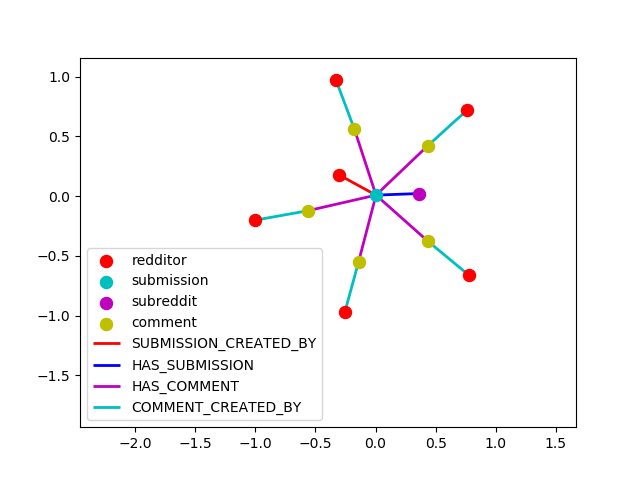

In [32]:
from matplotlib import colors as c
import random

# Draw nodes
colors = set(c.BASE_COLORS)
colors.remove("w")
chosen = set()
draw_nodes = []
for key in node_categories:
    color = random.choice(tuple(colors))
    draw_nodes.append(nx.draw_networkx_nodes(node_categories[key], pos, node_color=color, node_size=75, label=key))
    colors.remove(color)

In [33]:
# Separate edges by category
edge_categories = {}
for edge in nx_graph.edges(data=True):
    key = edge[2]["Label"]
    if key in edge_categories:
        edge_categories[key].append((edge[0], edge[1]))
    else:
        edge_categories[key] = [(edge[0], edge[1])]

In [34]:
# Draw edges
colors = set(c.BASE_COLORS)
colors.remove("w")
draw_edges = []
for key in edge_categories:
    color = random.choice(tuple(colors))
    draw_edges.append(nx.draw_networkx_edges(nx_graph, edgelist=edge_categories[key], pos=pos, edge_color=color, label=key, width=2))
    colors.remove(color)

In [35]:
# Show legend
legend = plt.legend()

In [36]:
plt.close(1)